In [1]:
import numpy as np
from sklearn.datasets import load_sample_image
import tensorflow as tf 
import keras
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

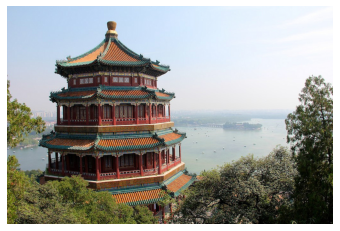

In [2]:
# Load sample images
china = load_sample_image("china.jpg") / 255

plt.imshow(china, cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()

## Pooling Layers

#### Max Pooling

In [3]:
max_pool = keras.layers.MaxPool2D(pool_size=2)
output = max_pool(china.reshape((1,)+ china.shape))

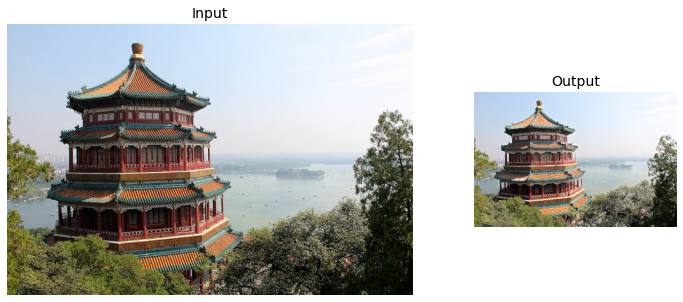

In [4]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(china)  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

#### Max Pooling

In [5]:
avg_pool = keras.layers.AvgPool2D(pool_size=2)
output_avg = avg_pool(china.reshape((1,)+ china.shape))

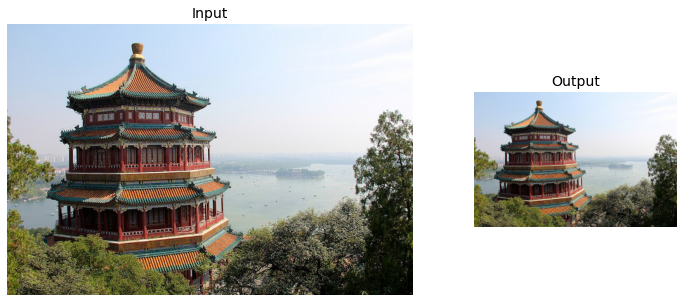

In [6]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(china)  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output_avg[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

# Convolutional Neural Network

Split in Trainings-, Validierungs- und Testdatensatz.

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, X_valid = X_train_full[:-20000], X_train_full[-20000:]
y_train, y_valid = y_train_full[:-20000], y_train_full[-20000:]

# Berechnet Mittelwert
X_mean = X_train.mean(axis=0, keepdims=True)

# Berechnet Stanardabweichung
X_std = X_train.std(axis=0, keepdims=True) + 1e-7

X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [8]:
X_train.shape

(40000, 28, 28, 1)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = keras.models.Sequential([
    keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    #keras.layers.Dropout(0.25),
    #keras.layers.Dense(128, activation="relu"),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_valid, y_valid),
    batch_size=128
)
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

Epoch 1/5
313/313 [==============================] - 9s 28ms/step - loss: 0.6871 - accuracy: 0.8065 - val_loss: 8405.7461 - val_accuracy: 0.9561
Epoch 2/5
313/313 [==============================] - 8s 27ms/step - loss: 0.1245 - accuracy: 0.9635 - val_loss: 3800.8252 - val_accuracy: 0.9727
Epoch 3/5
313/313 [==============================] - 8s 26ms/step - loss: 0.0703 - accuracy: 0.9794 - val_loss: 2498.3992 - val_accuracy: 0.9772
Epoch 4/5
313/313 [==============================] - 8s 26ms/step - loss: 0.0505 - accuracy: 0.9849 - val_loss: 3670.6724 - val_accuracy: 0.9765
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 104.6013 - accuracy: 0.9802


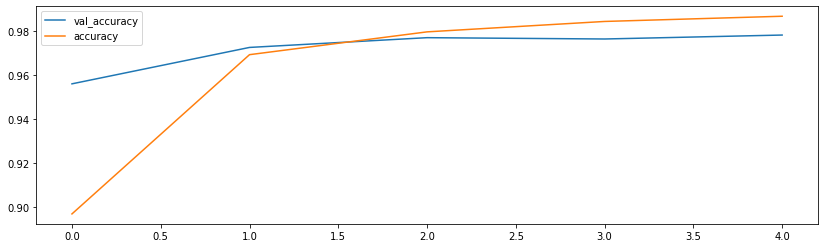

In [11]:
hist_df = pd.DataFrame(history.history)
plt.figure(figsize=(14, 4))
plt.plot(hist_df['val_accuracy'], label='val_accuracy')
plt.plot(hist_df['accuracy'], label='accuracy')
plt.legend()
plt.show()

# Übung
* Lade den fashion MNIST Datensatz und trainiere ein Convolutional Netzwerk darauf

Hinweis: Der fashion MNIST Datensatz kann mit 'keras.datasets.fashion_mnist.load_data()' geladen werden.

In [12]:
(X_train, y_train), (X_test, y_test) = 

SyntaxError: invalid syntax (<ipython-input-12-c4f58f36a1cf>, line 1)

Nach dem Laden der Daten: Skaliere die Bildaten so, dass die einzelnen Grauwerte in das Intervall (0, 1) fallen. 